# Lab 8: Unsupervised Learning from Unlabelled Data

## A: [*Principal component analysis* ](#partA); B: [*Autoencoder*](#partB)

**Sources**:  This notebook was previous created by Dr Haiping Lu and is based on various sources. Part A is based on the [Dimensionality Reduction: Latent Variable Modelling notebook](https://nbviewer.jupyter.org/github/lawrennd/mlai2015/blob/master/week8.ipynb) by Neil Lawrence [MLAI2015]. Part B is based on the [Autoencoder notebook by Lisa Zhang from APS360, University of Toronto](https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w05/autoencoder.html) and Lab 2 of Dr Lu's [SimplyDeep](https://github.com/haipinglu/SimplyDeep/)  notebooks.

There are *six* questions in this notebook.

### Why unsupervised learning?
So far we have focused mainly on [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) problems including regression and classification, where training data samples are all labelled. Now we are going to turn to a different form of learning, commonly known as [unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning). In unsupervised learning, our data are not labelled, but we want models that give us a better understanding of the data, which is called [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) in some contexts. Unsupervised learning is a fundamental problem in machine learning and the focus is to learn from unlabelled data. Unsupervised feature learning or representation learning can find wide usage in various applications for extracting useful information from often abundant unlabelled data.

# <a id='partA'></a>A: Principal Component Analysis (PCA)








## A1: PCA example in Scikit-learn

To observe how PCA can be applied using Scikit-learn we will explore using it on the Olivetti Faces dataset. Each of these images are a 64 by 64 pixel greyscale image of a persons face. Therefore, there is in total 4096 dimensions for the original data. Using PCA, we can test to see if we can transform the faces into smaller representation.

First, we shall load the dataset and plot as few of the faces so we know what the data is like.

/Users/rashidmehmood/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/rashidmehmood/scikit_learn_data


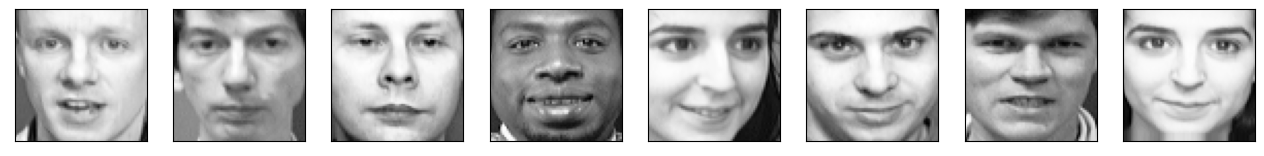

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces

faces, targets = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)
n_samples, n_features = faces.shape

plt.figure(figsize=(16, 2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(faces[i].reshape(64,64), cmap='Greys_r')
plt.show()

The Scikit-learn PCA class will fit and perform the transformation for us. Whilst there are a few parameters, the most important is `n_components` which is the number of principal components that will be kept in the transformed space.

In [4]:
from sklearn.decomposition import PCA

# create a PCA class with 4 components
pca = PCA(n_components=4)

# fit the PCA class to our training data.
pca.fit(faces)
test_faces = pca.transform(faces)
print(faces.shape)
print(test_faces.shape)


(400, 4096)
(400, 4)


Now that we have fitted our PCA transformation (internally this has built the transformation matrix $\mathbf{U}$) we can check to see how much of the origincal data variance if explained by each component.

In [3]:
print("Fraction of variance in each component:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum() )

Fraction of variance in each component: [0.23812722 0.13993962 0.0796861  0.04998332]
Total explained variance: 0.50773627


Remember these are eigenvalues normalised to the sum of the eigenvalues. The first component explains about 24% of the variance and in total the first 4 components explains about 50%. We might expect that this will be a poor transformation of our data.

Let's try transforming our faces, then transforming back to give reconstruced images. 

In [4]:
transformed_faces = pca.transform(faces)

reconstructed_faces = pca.inverse_transform(transformed_faces)

# Quantify how close our reconstruction is
from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(faces, reconstructed_faces)
print('Reconstruction error is ', reconstruction_error)

Reconstruction error is  0.009484761


The reconstruction error looks rather small (0.009484761) but it is hard to know whether this is a good value or not without a reference. Let's consider the result if we replace each image with it's mean value (a bit like having no components). 

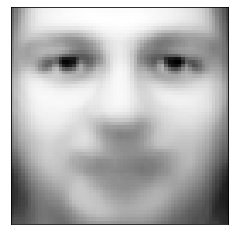

Reconstruction error is  0.019267648
So PCA(4) is an improved by  2.0314322


In [5]:
mean_face = faces.mean(axis=0)
plt.imshow(mean_face.reshape(64,64), cmap='Greys_r')
plt.xticks([])
plt.yticks([])
plt.show()

faces_as_mean = np.repeat(mean_face.reshape(1,-1), n_samples, axis=0)
reconstruction_as_mean_error = mean_squared_error(faces, faces_as_mean)
print('Reconstruction error is ', reconstruction_as_mean_error)
print('So PCA(4) is an improved by ', reconstruction_as_mean_error/reconstruction_error)

Compared to the mean face, PCA has reduced the error by a factor of 2 so it does help a little keeping 4 components. 
Let's plot some of the reconstructed faces to see how well it has performed visually.

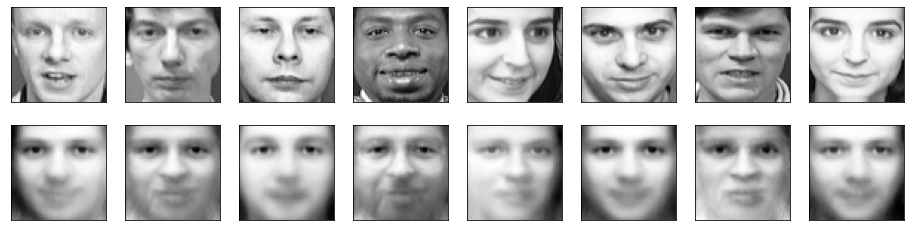

In [6]:
plt.figure(figsize=(16, 4))
for i in range(8):
    # Top row: show original faces
    plt.subplot(2,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(faces[i].reshape(64,64), cmap='Greys_r')
    # Bottom row: show reconstructions
    plt.subplot(2,8, 8+i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reconstructed_faces[i].reshape(64,64), cmap='Greys_r')
plt.show()

Most of the faces have not been reconstructed well, in fact most are close to the mean face and a lot of details are lost. It appears as if we need to use more components in our transformation.

---
**Question 1**

Create and fit a PCA transformation with 64 components than above. Plot the explained variance ratio and the cumulative sum of the explained varaince ratio against the number of components. How many components do you are suitable to keep?


In [7]:
# write your code here.

---
**Question 2**

Apply PCA using your choice for the number of components to keep from question 1. Transform the faces and then reconstruct them (as above), then plot the faces against the original. How successful was your choice of components in reconstruction?

In [8]:
# write your code here.

### Further exercises
Run the Scikit-learn example [Face recognition example using eigenfaces and SVMs](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html). More examples on PCA are at (the bottom of) the [PCA documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

## Background theory of PCA

The following discusses the background and history of PCA that is complementary to the lecture materials. The latent factor perspective will be useful to understanding generative models in the next session. If you are interetsted in the applications (how to use) PCA only, you may *safely skip* the remaining part of this section (A2 and A3), including the two questions.

### A2: Latent variable and latent factor analysis

This section discusses the context where PCA was first proposed.


#### Latent variables

Latent means hidden. [Latent variables](https://en.wikipedia.org/wiki/Latent_variable) are hidden, unobservable variables. Recall that [Artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) have three types of nodes (a.k.a. units) called artificial neurons: input, **hidden**, and output neurons.

Latent variables are also called **latent factors** (see below) when the focus is more on **analysing and interpreting** the data. In the following, let us look at the [factor analysis](https://en.wikipedia.org/wiki/Factor_analysis) problem first.

#### Factor analysis model as a multi-output regression problem

Note that in the following, $\mathbf{y}$ is observed and known while $\mathbf{x}$ is hidden, unknown, and to be estimated. This can be confusing because in the lecture, the input is $\mathbf{x}$ and the output (projections) is $\mathbf{y}$ so please mind the difference.

If we are given a high dimensional vector of features (perhaps questionaire answers) associated with an individual, $\mathbf{y}$, we assume that these factors are actually **generated** from a low dimensional vector latent traits, or latent variables $\mathbf{x}$, which determine the personality.
$$
\mathbf{y} = \mathbf{f}(\mathbf{x}) + \boldsymbol{\epsilon}
$$
where $\mathbf{f}(\mathbf{x})$ is a *vector valued* function that is dependent on the latent traits and $\boldsymbol{\epsilon}$ is some corrupting noise. For simplicity, we assume that the function is given by a *linear* relationship,
$$
\mathbf{f}(\mathbf{x}) = \mathbf{W}\mathbf{x}
$$
where we have introduced a matrix $\mathbf{W}$ that is sometimes referred to as the *factor loadings* but we also immediately see is related to our *multivariate linear regression* models. That is because our vector valued function is of the form
$$
\mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(\mathbf{x}) \\ f_2(\mathbf{x}) \\ \vdots \\ f_p(\mathbf{x})\end{bmatrix}
$$
where there are $p$ **features** associated with the individual. If we consider any of these functions individually we have a prediction function that looks like a regression model, 
$$
f_j(\mathbf{x}) = \mathbf{w}_{i, :} \mathbf{x}, 
$$
for each element of the vector valued function, where $\mathbf{w}_{i, :}$ is the $i$th row of the matrix $\mathbf{W}$. In the context of regression, each column of $\mathbf{W}$ is a vector of *regression weights*. This is a **multiple input and multiple output regression**. Our inputs (or covariates) have dimensionality greater than 1 and our outputs (or response variables) also have dimensionality greater than one, different from predicting a single output value in our previous sessions. Just as in a standard regression, we are assuming that we don't observe the function directly (note that this *also* makes the function a *type* of latent variable), but we observe some corrupted variant of the function, where the corruption is given by $\boldsymbol{\epsilon}$. Just as in linear regression we can assume that this corruption is given by Gaussian noise, where the noise for the $j$th element of $\mathbf{y}$ is by,
$$
\epsilon_j \sim \mathcal{N}(0, \sigma^2_j).
$$


Of course, just as in a regression problem we also need to make an assumption across the individual data points to form our full likelihood. Our data set now consists of many observations of $\mathbf{y}$ for different individuals. We store these observations in a *design matrix*, $\mathbf{Y}$, where each *row* of $\mathbf{Y}$ contains the observation for one individual. To emphasize that $\mathbf{y}$ is a vector derived from a row of $\mathbf{Y}$, we represent the observation of the features associated with the $i$th individual by $\mathbf{y}_{i, :}$, and place each individual in our data matrix,
$$
\mathbf{Y} = \begin{bmatrix} \mathbf{y}_{1, :}^\top \\ \mathbf{y}_{2, :}^\top \\ \vdots \\ \mathbf{y}_{n, :}^\top\end{bmatrix},
$$
where we have $n$ data points. Our data matrix therefore has $n$ rows and $p$ columns. The point to notice here is that each data obsesrvation appears as a row vector in the design matrix (thus the transpose operation inside the brackets). Our prediction functions are now actually a *matrix value* function, 
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top,
$$
where for each matrix the data points are in the rows and the data features are in the columns. This implies that if we have $q$ inputs to the function we have $\mathbf{F}\in \Re^{n\times p}$, $\mathbf{W} \in \Re^{p \times q}$ and $\mathbf{X} \in \Re^{n\times q}$. Note that $\mathbf{Y}$ equals to $\mathbf{F}$ + noise. 

$n$: number of data point

$p$: input feature dimension

$q$: latent feature dimension


---
**Question** 

Show that, given all the definitions above, if,
$$
\mathbf{F} = \mathbf{X}\mathbf{W}^\top
$$
and the elements of the vector valued function $\mathbf{F}$ are given by 
$$
f_{i, j} = f_j(\mathbf{x}_{i, :}),
$$
where $\mathbf{x}_{i, :}$ is the $i$th row of the latent variables, $\mathbf{X}$, then show that
$$f_j(\mathbf{x}_{i, :}) = \mathbf{x}_{i, :} \mathbf{w}_{j, :} ^\top,$$
where $\mathbf{w}_{j, :}$ is the $j$th row of $\mathbf{W}$.

**Answer**: 

---

#### Gaussian modelling of the factor analysis model

The difference between this factor analysis model and a multiple output regression is that in the regression case we are provided with the covariates $\mathbf{X}$, here they are *latent variables*. These variables are unknown.

Just as we have done in the past for unknowns, we now treat them with a probability distribution. In *factor analysis* we assume that the latent variables have a Gaussian density which is independent across both across the latent variables associated with the different data points, and across those associated with different data features, so we have,
$$
x_{i,j} \sim \mathcal{N}(0, 1),
$$
and we can write the density governing the latent variable associated with a single point as,
$$
\mathbf{x}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}).
$$
If we consider the values of the function for the $i$th data point as
$$
\mathbf{f}_{i, :} = \mathbf{f}(\mathbf{x}_{i, :}) = \mathbf{W}\mathbf{x}_{i, :} 
$$
then we can use the rules for multivariate Gaussian relationships to write that
$$
\mathbf{f}_{i, :} \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top)
$$
which implies that the distribution for $\mathbf{y}_{i, :}$ is given by
$$
\mathbf{y}_{i, :} = \sim \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma})
$$
where $\boldsymbol{\Sigma}$ the covariance of the noise variable, $\epsilon_{i, :}$ which for factor analysis is a diagonal matrix (because we have assumed that the noise was **independent** across the features),
$$
\boldsymbol{\Sigma} = \begin{bmatrix}\sigma^2_{1} & 0 & 0 & 0\\
                                     0 & \sigma^2_{2} & 0 & 0\\
                                     0 & 0 & \ddots & 0\\
                                     0 & 0 & 0 & \sigma^2_p\end{bmatrix}.
$$
For completeness, we could also add in a *mean* for the data vector $\boldsymbol{\mu}$, 
$$
\mathbf{y}_{i, :} = \mathbf{W} \mathbf{x}_{i, :} + \boldsymbol{\mu} + \boldsymbol{\epsilon}_{i, :}
$$
which would give our marginal distribution for $\mathbf{y}_{i, :}$ a mean $\boldsymbol{\mu}$. However, the maximum likelihood solution for $\boldsymbol{\mu}$ turns out to equal the empirical mean of the data,
$$
\hat{\boldsymbol{\mu}} = \frac{1}{n} \sum_{i=1}^n \mathbf{y}_{i, :},
$$
*regardless* of the form of the covariance, $\mathbf{C} = \mathbf{W}\mathbf{W}^\top + \boldsymbol{\Sigma}$. As a result it is very common to simply preprocess the data and ensure it is zero mean. 

The prior density over latent variables is independent, and the likelihood is independent, that means that the marginal likelihood here is also independent over the data points. 
                                     
Factor analysis was developed mainly in psychology and the social sciences for understanding personality and intelligence. [Charles Spearman](http://en.wikipedia.org/wiki/Charles_Spearman) was concerned with the measurements of "the abilities of man" and is credited with the earliest version of factor analysis.                                    


### A3: PCA background
This section discusses how PCA was first proposed and the mathematical background for PCA.

#### Background on PCA and factor analysis (history)

In 1933 [Harold Hotelling](http://en.wikipedia.org/wiki/Harold_Hotelling) published on *principal component analysis* the first mention of this approach. Hotelling's inspiration was to provide mathematical foundation for factor analysis methods that were by then widely used within psychology and the social sciences. His model was a factor analysis model, but he considered the noiseless 'limit' of the model. In other words he took $\sigma^2_i \rightarrow 0$ so that he had
$$
\mathbf{y}_{i, :} \sim \lim_{\sigma^2 \rightarrow 0} \mathcal{N}(\mathbf{0}, \mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}).
$$
The paper had two unfortunate effects. 

  * Firstly, the resulting model is no longer valid probablistically, because the covariance of this Gaussian is 'degenerate'. Because $\mathbf{W}\mathbf{W}^\top$ has rank of at most $q$ where $q<p$ (due to the dimensionality reduction) the determinant of the covariance is zero, meaning the inverse doesn't exist so the density,
$$
p(\mathbf{y}_{i, :}|\mathbf{W}) = \lim_{\sigma^2 \rightarrow 0} \frac{1}{(2\pi)^\frac{p}{2} |\mathbf{W}\mathbf{W}^\top + \sigma^2 \mathbf{I}|} \exp\left(-\frac{1}{2}\mathbf{y}_{i, :}\left[\mathbf{W}\mathbf{W}^\top+ \sigma^2 \mathbf{I}\right]^{-1}\mathbf{y}_{i, :}\right),
$$
is *not* valid for $q<p$ (where $\mathbf{W}\in \Re^{p\times q}$). This mathematical consequence is a probability density which has no 'support' in large regions of the space for $\mathbf{y}_{i, :}$. There are regions for which the probability of $\mathbf{y}_{i, :}$ is zero. These are any regions that lie off the hyperplane defined by mapping from $\mathbf{x}$ to $\mathbf{y}$ with the matrix $\mathbf{W}$. In factor analysis, the noise corruption, $\boldsymbol{\epsilon}$, allows for points to be found away from the hyperplane. In Hotelling's PCA, the noise variance is zero, so there is only support for points that fall precisely on the hyperplane. 
  * Secondly, Hotelling explicity chose to rename factor analysis as principal component analysis, arguing that the factors social scientist sought were different in nature to the concept of a mathematical factor. This was unfortunate because the factor loadings, $\mathbf{W}$ can also be seen as factors in the mathematical sense because the model Hotelling defined is a Gaussian model with covariance given by $\mathbf{C} = \mathbf{W}\mathbf{W}^\top$ so $\mathbf{W}$ is a *factor* of the covariance in the mathematical sense, as well as a factor loading. 

However, the paper had one great advantage over standard approaches to factor analysis. Despite the fact that the model was a special case that is subsumed by the more general approach of factor analysis, it is this special case that leads to a particular algorithm, namely that the factor loadings (or principal components as Hotelling referred to them) are given by an [eigendecomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix) of the empirical covariance matrix. 


#### Eigendecomposition

Eigenvalue problems are widespreads in physics and mathematics, they are often written as a matrix/vector equation but we prefer to write them as a full matrix equation. In an eigenvalue problem, we are looking to find a matrix of eigenvectors, $\mathbf{U}$ and a *diagonal* matrix of eigenvalues, $\boldsymbol{\Lambda}$ that satisfy the *matrix* equation
$$
\mathbf{A}\mathbf{U} = \mathbf{U}\boldsymbol{\Lambda},
$$
where $\mathbf{A}$ is our matrix of interest. This equation is not trivially solvable through matrix inverse because matrix multiplication is not [commutative](http://en.wikipedia.org/wiki/Commutative_property), so premultiplying by $\mathbf{U}^{-1}$ gives
$$
\mathbf{U}^{-1}\mathbf{A}\mathbf{U} = \boldsymbol{\Lambda}, 
$$
where $\boldsymbol{\Lambda}$ is a *diagonal* matrix, so the eigenvectors can be used to *diagonalise* the matrix. When performing the eigendecomposition on a Gaussian covariances, diagonalisation is very important because it returns the covariance to a form where there is no correlation between points. 

#### Positive definite

We are interested in the case where $\mathbf{A}$ is a covariance matrix, which implies it is *positive definite*. A positive definite matrix is one for which the inner product,
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}
$$
is positive for *all* values of the vector $\mathbf{w}$ other than the zero vector. One way of creating a positive definite matrix is to assume that the symmetric and positive definite matrix $\mathbf{C}\in \Re^{p\times p}$ is factorised into, $\mathbf{A}\in \Re^{p\times p}$, a *full rank* matrix, so that
$$
\mathbf{C} = \mathbf{A}^\top \mathbf{A}.
$$
This ensures that $\mathbf{C}$ must be positive definite because
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w}=\mathbf{w}^\top \mathbf{A}^\top\mathbf{A}\mathbf{w} 
$$
and if we now define a new *vector* $\mathbf{b}$ as
$$
\mathbf{b} = \mathbf{A}\mathbf{w}
$$
we can now rewrite as
$$
\mathbf{w}^\top \mathbf{C}\mathbf{w} = \mathbf{b}^\top\mathbf{b} = \sum_{i} b_i^2
$$
which, since it is a sum of squares, is positive or zero. The constraint that $\mathbf{A}$ must be *full rank* ensures that there is no vector $\mathbf{w}$, other than the zero vector, which causes the vector $\mathbf{b}$ to be all zeros. 

You may want to review what is the rank of a matrix and what full rank means [here](https://en.wikipedia.org/wiki/Rank_(linear_algebra)).

---
**Question**

If $\mathbf{C}=\mathbf{A}^\top \mathbf{A}$ then express $c_{i,j}$, the value of the element at the $i$th row and the $j$th column of $\mathbf{C}$, in terms of the columns of $\mathbf{A}$. Use this to show that (i) the matrix is symmetric and (ii) the matrix has positive elements along its diagonal, assuming $\mathbf{A}$ is of full rank.

**Answer**: 

---

#### Eigenvectors of a symmetric matrix

[Symmetric matrices](https://en.wikipedia.org/wiki/Symmetric_matrix) have *orthogonal* eigenvectors, which are often normalised to unit norm to obtain *orthonormal* eigenvectors. This means that $\mathbf{U}$ is an [orthogonal matrix](http://en.wikipedia.org/wiki/Orthogonal_matrix), $\mathbf{U}^\top\mathbf{U} = \mathbf{I}$. This implies that $\mathbf{u}_{:, i} ^\top \mathbf{u}_{:, j}$ is equal to 0 if $i\neq j$ and 1 if $i=j$. 

#### PCA for high-dimensional data  
For $p$>>$n$ (generally the case in practice), you need to consider how to do the larger eigenvalue probleme efficiently without large demands on computer memory.


When the data is quite high dimensional, solving the eigenvalue problem in the high dimensional space can take some time. At this point we turn to a neat trick, you don't have to solve the full eigenvalue problem in the $p\times p$ covariance, you can choose instead to solve the related eigenvalue problem in the $n \times n$ space, and in this case $n=200$ which is much smaller than $p$.

The original eigenvalue problem has the form
$$
\mathbf{Y}^\top\mathbf{Y} \mathbf{u} = \lambda\mathbf{u}
$$
Let us look at a related eigenvalue problem.
$$
\mathbf{Y}\mathbf{Y}^\top \mathbf{v} = \sigma\mathbf{v}
$$
Let us multiply the left hand side by $\mathbf{Y}^\top$, then we have
$$
\mathbf{Y}^\top\mathbf{Y}(\mathbf{Y}^\top \mathbf{v}) = \sigma(\mathbf{Y}^\top\mathbf{v}).
$$
Note that $(\mathbf{Y}^\top\mathbf{v})$ is an eigenvector of $\mathbf{Y}^\top\mathbf{Y}$. Thus, we can obtain the eigenvector of $\mathbf{Y}^\top\mathbf{Y}$ ($p\times p$) via obtaining the eigenvector of $\mathbf{Y}\mathbf{Y}^\top$ ($n\times n$) and then multiply it by $\mathbf{Y}^\top$.

<!--But if we premultiply by $\mathbf{Y}$ then we can solve,
$$
\mathbf{Y}\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \mathbf{Y}\mathbf{U}\boldsymbol{\Lambda}.
$$
Now let us multiply the right hand side by \Lambda^{-\frac{1}{2}}, we have
$$
\mathbf{Y}\mathbf{Y}^\top(\mathbf{Y} \mathbf{U}\Lambda^{-\frac{1}{2}}) = (\mathbf{Y}\mathbf{U}\Lambda^{-\frac{1}{2}})\boldsymbol{\Lambda}.
$$
Here, note here we used the property that if $\mathbf{A}$ and $\mathbf{B}$ are diagonal, $\mathbf{A}\mathbf{B}=\mathbf{B}\mathbf{A}$.
Let us define a new matrix
$$
\mathbf{U}^\prime = \mathbf{Y} \mathbf{U} \Lambda^{-\frac{1}{2}}
$$
We can verify that $\mathbf{U}^\prime$ is an orthorormal matrix because
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \Lambda^{-\frac{1}{2}}\mathbf{U}^\top\mathbf{Y}^\top\mathbf{Y} \mathbf{U} \Lambda^{-\frac{1}{2}}
$$
and since $\mathbf{U}$ diagonalises $\mathbf{Y}^\top\mathbf{Y}$, 
$$
\mathbf{U}^\top\mathbf{Y}^\top\mathbf{Y} \mathbf{U} = \Lambda
$$
then 
$$
\left.\mathbf{U}^\prime\right.^\top\mathbf{U}^\prime = \mathbf{I}
$$
Using this new variable, we have 
$$
\mathbf{Y}\mathbf{Y}^\top\mathbf{U}^\prime = \mathbf{U}^\prime\boldsymbol{\Lambda}.
$$
Thus, $\mathbf{U}^\prime$ is the (normalised) eigenvector of $\mathbf{Y}\mathbf{Y}^\top$ ($n\times n$). We can obtain $\mathbf{U}^\prime$ 
end -->

# <a id='partB'></a>B: Autoencoder with PyTorch

Next, we perform unsupervised feature learning via [autoencoder](https://en.wikipedia.org/wiki/Autoencoder) in PyTorch. We are going to build an autoencoder to learn a low-dimensional representation of some specific images, in a particular dataset.  

#### Libaries

Get ready by importing the standard APIs

In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

#Set the random seed for reproducibility 
torch.manual_seed(2020) 

#### Data
Let us work with the popular [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) with handwritten digits. We will work on a small subset here for efficiency.

In [10]:
mnist_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
print(len(mnist_data))

# Take out only the first 4096 samples
mnist_data = list(mnist_data)[:4096]
print(len(mnist_data))

# I don't recommend splitting the dataset in this manner normally, using list().
# You should consider using the PyTorch random_split here:
# https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split

60000
4096


---
**Question 3**

When we choose to work on a subset above `mnist_data = list(mnist_data)[:4096]`, why do we choose the number 4096, e.g. rather than 4000? What's special about 4096?

**Answer**: 

---

#### Define the NN architecture
Define an autoencoder class consisting of an **encoder** followed by a **decoder** below.
<img src="https://miro.medium.com/max/3148/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" style="height:5cm;"/>

Let's define our auto-encoder model. To start with let's consider model with two linear layers: one to encode the image, one to decode it.

In [11]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # Transform the 28 by 28 image to an embedded code size of 30
            nn.Linear(784, 30),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(30, 784),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        # x will be a (batch_size,1,28,28) tensor when using MNIST
        # so we will reshape it to a (batch_size, 28*28) flat tensor.
        # After it has been decoded we will reshape back to the image shape.
        x = self.encoder(x.view(-1, 784))
        x = self.decoder(x)
        return x.view(-1, 1, 28, 28)

Again, `__init__()` defines the layers, using `nn.Sequential` this time.  `forward()` defines the *forward pass* that transform the input to the output. `backward()` is automatically defined using `autograd`. `ReLu()` and `Sigmoid()` are [rectified linear unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) and [Sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), two popular **activation function** that performs a *nonlinear* transformation/mapping of an input variable (element-wise operation).



#### Inspect the NN architecture

Now let's take a look at the autoencoder built.

In [48]:
myAE=Autoencoder()
print(myAE)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=30, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


Let us check the (randomly initialised) parameters of this NN. Below, we check the first 2D convolution and the ReLu activiation function. 

In [42]:
params = list(myAE.parameters())
print(len(params))
print(params[0].size())  # First Linear's .weight
print(params[1].size())  # First Linear's .bias
print(params[1])

4
torch.Size([30, 784])
torch.Size([30])
Parameter containing:
tensor([-2.2609e-03, -1.4428e+00, -4.8589e-03, -2.1481e-01,  3.3510e-01,
        -6.9656e-02,  1.5822e+00,  1.7948e+00, -1.4062e-03,  6.8107e-01,
         6.4172e-02,  2.0390e+00, -4.6955e-03,  7.8651e-01, -2.3522e-01,
         2.1413e-01,  3.6934e-01,  1.4845e+00, -7.7625e-01, -1.6304e+00,
         6.0298e-02,  2.5171e+00,  1.6841e+00,  1.6071e+00, -4.7543e-03,
         1.5864e+00,  8.9571e-01, -3.4729e-04, -3.0700e-02,  1.8360e+00],
       requires_grad=True)


#### Train the NN
Next, we will feed data in this autoencoder to train it, i.e., learn its parameters so that the reconstruction error (the `loss`) is minimised, using the mean square error (MSE) and `Adam` optimiser. The dataset is loaded in batches to train the model. One `epoch` means one cycle through the full training dataset. The `outputs` at the end of each epoch save the orignal image and the reconstructed (decoded) image pairs for later inspection. Again, the steps are 
* Define the optimisation criteria and optimisation method.
* Iterate through the whole dataset in batches, for a number of `epochs` till a maximum specified or a convergence criteria (e.g., successive change of loss < 0.000001)
* In each batch processing, we 
    * do a forward pass
    * compute the loss
    * backpropagate the loss via `autograd`
    * update the parameters

In [52]:
def train_AE(model, dataset, max_epochs=20, print_steps=5):
    #Training (optimisation) parameters
    batch_size=64
    learning_rate=1e-3

    #Choose mean square error loss
    criterion = nn.MSELoss() 

    #Choose the Adam optimiser
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    #Specify how the data will be loaded in batches (with random shuffling)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    #Storage
    outputs = []

    #Start training
    for epoch in range(max_epochs):
        for img, label in train_loader:
            recon = model(img)
            loss = criterion(recon, img)

            loss.backward()
            optimizer.step()  
            optimizer.zero_grad()
          
        if ((epoch % print_steps) == 0) or (epoch +1 == max_epochs):
            print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, loss.item()))
        outputs.append((epoch, img.detach(), recon.detach()),)

    return outputs



In [49]:
outputs = train_AE(myAE, mnist_data, max_epochs=50)

Epoch:1, Loss:0.0717
Epoch:6, Loss:0.0403
Epoch:11, Loss:0.0270
Epoch:16, Loss:0.0219
Epoch:21, Loss:0.0218
Epoch:26, Loss:0.0187
Epoch:31, Loss:0.0185
Epoch:36, Loss:0.0150
Epoch:41, Loss:0.0154
Epoch:46, Loss:0.0143
Epoch:50, Loss:0.0136


We can see the loss is being well minimised. 

We can inspect the reconstructed images at different epochs below. Note here we use `.detach()` because the gradients are not needed for inspection purpose here. 

Epoch: 1
Epoch: 11
Epoch: 21
Epoch: 31
Epoch: 41


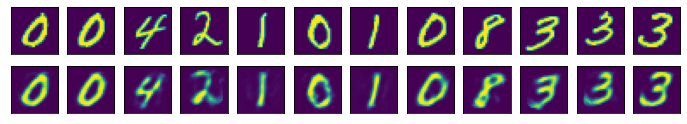

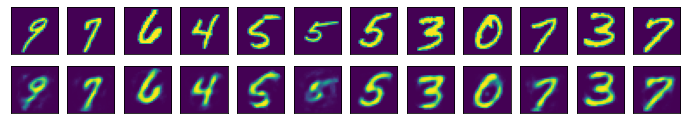

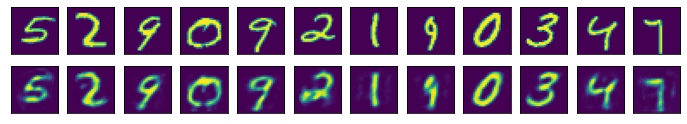

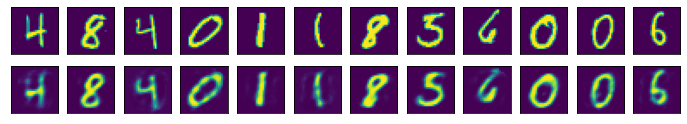

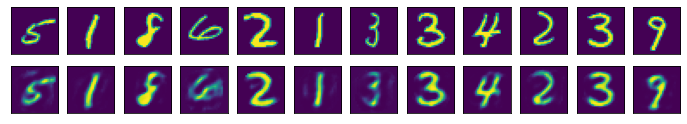

In [47]:
numImgs=12;
for k in range(0, len(outputs), 10):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].numpy()    
    recon = outputs[k][2].numpy()
    print('Epoch:', k+1)
    for i, item in enumerate(imgs):
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(item[0])

For a comparison let's compare our auto-encoder to PCA. They are similar but our auto-encoder has a non-linear activation function while PCA does not. Let's compute the mean squared error to compare to the loss above (they should be the same metric).

In [16]:
from sklearn.decomposition import PCA

# create a PCA class with 30 components
pca = PCA(n_components=30)

# Create a dataloader to pass all the training data
train_loader = torch.utils.data.DataLoader(mnist_data, batch_size=len(mnist_data))
images, labels = next(iter(train_loader))

transformed_images = pca.fit_transform(images.numpy().reshape(-1,28*28))
reconstructed_images = pca.inverse_transform(transformed_images)

from sklearn.metrics import mean_squared_error
reconstruction_error = mean_squared_error(images.numpy().reshape(-1,28*28), reconstructed_images)
print('Reconstruction error is ', reconstruction_error)


Reconstruction error is  0.017547632


So PCA does perform slightly worse than the auto-encoder (plus the auto-encoder can still be tuned a little bit more). 

## Improving the auto-encoder architecture

**Question 3** 
Currently our auto-encoder uses linear layers but we have already discussed how convolutional layers can be better when applied to images. Let's modify the definition of the auto-encoder to use them. We want an auto-encoder with 3 convolutional layers in both the encoder and decoder. 
The first layer is defined for you but you need to complete the definition so that it has the following structure:


**Encoder**
- Conv2d: 1 input channel, 16 output channels, 3x3 square convolution, stride 2, pad 1. (already coded)
- ReLU activation function
- Conv2d: 16 input channel, 32 output channels, 3x3 square convolution, stride 2, pad 1.
- ReLU activation function
- Conv2d: 32 input channel, 64 output channels, 7x7 square convolution, stride 1, pad 0.

**Decoder**
- ConvTranspose2d: 32 input channel, 64 output channels, 7x7 square convolution, stride 1.
- ReLU activation function
- ConvTranspose2d: 16 input channel, 32 output channels, 3x3 square convolution, stride 2, pad1, output pad 1.
- ReLU activation function
- ConvTranspose2d: 1 input channel, 16 output channels, 3x3 square convolution, stride 2, pad 1, output pad 1. (already coded)
- Sigmoid activation function (already coded)

The sigmoid activation function at the end returns our output in the range $[0,1]$ which is what is expected for the pixel intensity.


Note: If you don't program the other layers and run the model you might find that you get better performance. Why do you think this is? 
Remember the goal of the auto-encoder is to find a reduced dimensionality.

In [72]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            # activation function
            # conv layer
            # activation function 
            # conv layer
        )
        self.decoder = nn.Sequential(
            # conv transpose layer
            # activation function
            # conv transpose layer
            # activation function
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Here, we have both convolution layers `Conv2d()` and transpose convolution layers `ConvTranspose2d()`, with nice illustrations at [Convolution arithmetic](https://github.com/vdumoulin/conv_arithmetic). The basic ones are reproduced below where blue maps indicate inputs, and cyan maps indicate outputs.


**Convolution with no padding, no stride**

![Convolution](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

**Transpose convolution with no padding, no strides**

![Transposed convolution](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides_transposed.gif)


In [73]:
myCAE = ConvAutoencoder()
print(myCAE)

ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): Sigmoid()
  )
)


In [74]:
outputs = train_AE(myCAE, mnist_data, max_epochs=30, print_steps=5)

Epoch:1, Loss:0.1091
Epoch:6, Loss:0.0076
Epoch:11, Loss:0.0029
Epoch:16, Loss:0.0018
Epoch:21, Loss:0.0015
Epoch:26, Loss:0.0013
Epoch:30, Loss:0.0012


Your convolutional auto-encoder should reach a lower loss than before. Let's check out some of the resulting images as well.

Epoch: 1
Epoch: 11
Epoch: 21


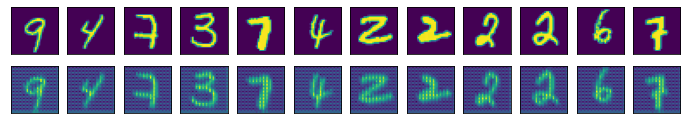

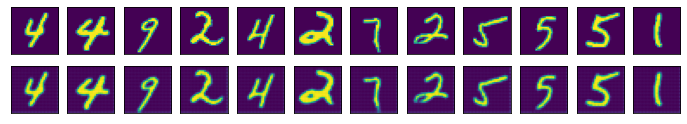

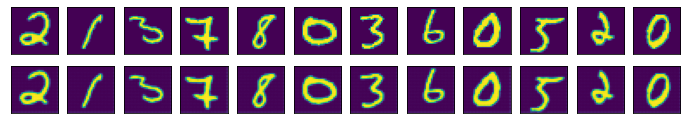

In [75]:
numImgs=12;
for k in range(0, len(outputs), 10):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].numpy()    
    recon = outputs[k][2].numpy()
    print('Epoch:', k+1)
    for i, item in enumerate(imgs):
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(item[0])

Hopefully your convolutional auto-encoder has done a better job at reconstructing the images.

#### Generate synthesised images
We can **interpolate** between two images via the learned embeddding. Let us pick the first `5` (on my machine) and fifth image `9`  (on my machine) from the first epoch and obtain the low-dimensional embedding using the learned encoder. 

In [78]:
img1Index=0;
img2Index=4;

x1, label1 = mnist_data[img1Index] # first image
x2, label2 = mnist_data[img2Index] # second image

x = torch.stack([x1,x2])     # stack them together so we only call `encoder` once

embedding = myCAE.encoder(x)
e1 = embedding[0] # embedding of first image
e2 = embedding[1] # embedding of second image
print(e1.size())

torch.Size([16, 14, 14])


In [79]:
embedding.size()

torch.Size([2, 16, 14, 14])

In the embedding space, we do a linear interpolation between the two embeddings and then decode these interpolated embeddings into images.

If we have two embedding codes given by tensors $\mathbf{e}_1$ and $\mathbf{e}_2$ we can generate an embedding that lies between them by using
$$ \mathbf{e} = (1- a) \mathbf{e}_1 + a \mathbf{e}_2 $$
where $a$ is the fraction of $\mathbf{e}_2$ in the generated tensor.

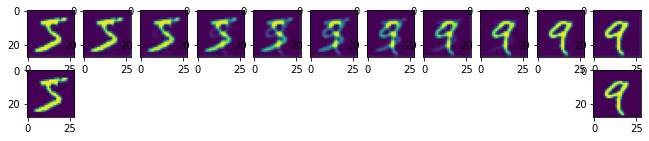

In [77]:
embedding_values = []
for a in np.linspace(0, 1, 11):
    e = e1 * (1-a) + e2 * a
    embedding_values.append(e)
embedding_values = torch.stack(embedding_values)

recons = myCAE.decoder(embedding_values)

plt.figure(figsize=(11, 2))
for i, recon in enumerate(recons.detach().numpy()):
    plt.subplot(2,11,i+1)
    plt.imshow(recon[0])

plt.subplot(2,11,12)
plt.imshow(x1.reshape((28,28)))
plt.subplot(2,11,22)
plt.imshow(x2.reshape((28,28)))

---
**Question 4**

Define and train an auto-encoder that has a 'code' size of 2 (i.e after applying the encoder each image should be compressed to just 2 values). It will be easier to modify the auto-encoder with linear layers but if you feel adventurous you can try the convolutional auto-encoder. 

After you have trained it, use your auto-encoder to transform the training data and make a scatter plot of the transformed data. Colour the scatter points by the label. How well are the images of a given label grouped together?

---

## Additional ideas to explore

* Code PCA using ``torch.nn`` and compare it with the close-form solution via eigendecomposition (e.g. that in `sklearn`).
* Try out different optimisers or different loss function (the L1loss, MAE) and compare the results.
* Change the architecture of autoencoder (e.g., depth, other layers such as max pooling, different activation functions) to compare the results.
* Repeat the above on a subset from the CIFAR10 dataset. For example, you can interpolate a cat and a dog.